# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

In [3]:
citiesdf = pd.DataFrame({"City": cities, "Country": "",  "Date": "", "Latitude": "", "Longitude": "", 
                         "Max Temperature (F)": "", "Humidity (%)": "", "Cloudiness (%)": "","Wind Speed (mph)": ""})
citiesdf.head()

,City,Country,Date,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,lagos,,,,,,,,
1,vostok,,,,,,,,
2,hilo,,,,,,,,
3,dali,,,,,,,,
4,tuatapere,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
counter = 1

print("Beginning Data Retrival")
for index, row in citiesdf.iterrows():
    target_city = row["City"]
    target_url = url + "&appid=" + api_key + "&units=" + units + "&q=" + target_city.replace(" ","+")   
    response = requests.get(target_url).json()
    time.sleep(1)

    if response["cod"] == "404":
        print("-----------------------------------")
        print("Information for " +(target_city)+ " is missing")
       
    else:
        citiesdf.loc[index, 'City'] = response['name']
        citiesdf.loc[index, 'Country'] = response['sys']['country']
        citiesdf.loc[index, 'Date'] = response['dt']
        citiesdf.loc[index, 'Latitude'] = response['coord']['lat']
        citiesdf.loc[index, 'Longitude'] = response['coord']['lon']
        citiesdf.loc[index, 'Max Temperature (F)'] = response['main']['temp_max']
        citiesdf.loc[index, 'Humidity (%)'] = response['main']['humidity']
        citiesdf.loc[index, 'Cloudiness (%)'] = response['clouds']['all']
        citiesdf.loc[index, 'Wind Speed (mph)'] = response['wind']['speed']
     
        print("-----------------------------------")
        print("Processing: City # "+str(counter))
        print("The City name is "+(response['name']))
        print(target_url)
        counter +=1
        
print("Data Retrival Complete")

Beginning Data Retrival
-----------------------------------
Processing: City # 1
The City name is Lagos
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=lagos
-----------------------------------
Processing: City # 2
The City name is Vostok
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=vostok
-----------------------------------
Processing: City # 3
The City name is Hilo
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=hilo
-----------------------------------
Processing: City # 4
The City name is Dali
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=dali
-----------------------------------
Processing: City # 5
The City name is Tuatapere
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=tuatapere
--------------------

-----------------------------------
Processing: City # 41
The City name is Broome
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=broome
-----------------------------------
Processing: City # 42
The City name is Tabas
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=tabas
-----------------------------------
Processing: City # 43
The City name is Egvekinot
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=egvekinot
-----------------------------------
Information for sidi bu zayd is missing
-----------------------------------
Processing: City # 44
The City name is Paamiut
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=paamiut
-----------------------------------
Processing: City # 45
The City name is Touros
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d

-----------------------------------
Processing: City # 81
The City name is Jamestown
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=jamestown
-----------------------------------
Processing: City # 82
The City name is Naze
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=naze
-----------------------------------
Processing: City # 83
The City name is Dongsheng
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=dongsheng
-----------------------------------
Information for kadykchan is missing
-----------------------------------
Processing: City # 84
The City name is Sainte-Marie
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=sainte-marie
-----------------------------------
Processing: City # 85
The City name is High Level
http://api.openweathermap.org/data/2.5/weather?&a

-----------------------------------
Processing: City # 120
The City name is Lata
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=lata
-----------------------------------
Processing: City # 121
The City name is Upernavik
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=upernavik
-----------------------------------
Processing: City # 122
The City name is Yellowknife
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=yellowknife
-----------------------------------
Processing: City # 123
The City name is Surt
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=surt
-----------------------------------
Processing: City # 124
The City name is Zyryanka
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=zyryanka
------------------

-----------------------------------
Processing: City # 160
The City name is Chicama
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=chicama
-----------------------------------
Processing: City # 161
The City name is Portland
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=portland
-----------------------------------
Processing: City # 162
The City name is Bilibino
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=bilibino
-----------------------------------
Processing: City # 163
The City name is Chalchihuites
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=chalchihuites
-----------------------------------
Processing: City # 164
The City name is Avarua
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=avarua
------

-----------------------------------
Processing: City # 199
The City name is Pisco
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=pisco
-----------------------------------
Processing: City # 200
The City name is Torbat-e Jam
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=torbat-e+jam
-----------------------------------
Information for kuche is missing
-----------------------------------
Processing: City # 201
The City name is Erenhot
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=erenhot
-----------------------------------
Processing: City # 202
The City name is Hasaki
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=hasaki
-----------------------------------
Processing: City # 203
The City name is Haines Junction
http://api.openweathermap.org/data/2.5/weather?&app

-----------------------------------
Processing: City # 239
The City name is Terme
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=terme
-----------------------------------
Processing: City # 240
The City name is Lingao
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=lingao
-----------------------------------
Processing: City # 241
The City name is Iskateley
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=iskateley
-----------------------------------
Information for vastervik is missing
-----------------------------------
Processing: City # 242
The City name is Westport
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=westport
-----------------------------------
Processing: City # 243
The City name is Muzhi
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db

-----------------------------------
Processing: City # 279
The City name is Iralaya
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=iralaya
-----------------------------------
Processing: City # 280
The City name is Khor
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=khor
-----------------------------------
Information for wazzan is missing
-----------------------------------
Processing: City # 281
The City name is West Melbourne
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=west+melbourne
-----------------------------------
Processing: City # 282
The City name is Dunmore East
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=dunmore+east
-----------------------------------
Processing: City # 283
The City name is Nantucket
http://api.openweathermap.org/data/2.5/wea

-----------------------------------
Processing: City # 319
The City name is Gravdal
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=gravdal
-----------------------------------
Processing: City # 320
The City name is Trincomalee
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=trincomalee
-----------------------------------
Processing: City # 321
The City name is Louth
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=louth
-----------------------------------
Processing: City # 322
The City name is Straumen
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=straumen
-----------------------------------
Processing: City # 323
The City name is Namatanai
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=namatanai
----------

-----------------------------------
Processing: City # 360
The City name is Leningradskiy
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=leningradskiy
-----------------------------------
Processing: City # 361
The City name is Alta Floresta
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=alta+floresta
-----------------------------------
Processing: City # 362
The City name is Novyy Urengoy
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=novyy+urengoy
-----------------------------------
Processing: City # 363
The City name is Beisfjord
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=beisfjord
-----------------------------------
Processing: City # 364
The City name is Sungaipenuh
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&u

-----------------------------------
Information for qandahar is missing
-----------------------------------
Processing: City # 399
The City name is Jalu
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=jalu
-----------------------------------
Processing: City # 400
The City name is Cayenne
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=cayenne
-----------------------------------
Processing: City # 401
The City name is Pokrovsk
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=pokrovsk
-----------------------------------
Processing: City # 402
The City name is Tilichiki
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=tilichiki
-----------------------------------
Processing: City # 403
The City name is Guerrero Negro
http://api.openweathermap.org/data/2.5/weather?&appid

-----------------------------------
Processing: City # 440
The City name is Provideniya
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=provideniya
-----------------------------------
Processing: City # 441
The City name is Changtu
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=changtu
-----------------------------------
Processing: City # 442
The City name is Sinjar
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=sinjar
-----------------------------------
Processing: City # 443
The City name is Los Llanos de Aridane
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=los+llanos+de+aridane
-----------------------------------
Processing: City # 444
The City name is Stawell
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imper

-----------------------------------
Processing: City # 481
The City name is Presidencia Roque Saenz Pena
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=presidencia+roque+saenz+pena
-----------------------------------
Processing: City # 482
The City name is Plettenberg Bay
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=plettenberg+bay
-----------------------------------
Processing: City # 483
The City name is Lazaro Cardenas
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=lazaro+cardenas
-----------------------------------
Processing: City # 484
The City name is Caluquembe
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=caluquembe
-----------------------------------
Processing: City # 485
The City name is Harsud
http://api.openweathermap.org/data/2.5/weather?&appid

-----------------------------------
Processing: City # 521
The City name is Mehamn
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=mehamn
-----------------------------------
Processing: City # 522
The City name is Bowen
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=bowen
-----------------------------------
Processing: City # 523
The City name is Grand-Santi
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=grand-santi
-----------------------------------
Processing: City # 524
The City name is Vao
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=vao
-----------------------------------
Processing: City # 525
The City name is Rudnogorsk
http://api.openweathermap.org/data/2.5/weather?&appid=f18e5db66d8f16d02c9a32b2d29ba147&units=imperial&q=rudnogorsk
--------------------

In [5]:
citiesdf.count()

City                   587
Country                587
Date                   587
Latitude               587
Longitude              587
Max Temperature (F)    587
Humidity (%)           587
Cloudiness (%)         587
Wind Speed (mph)       587
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
citiesdf.to_csv("WeatherPy_City.csv", index=False)
citiesdf = pd.read_csv("WeatherPy_City.csv")

In [7]:
#Drop blank cells
citiesdf.dropna(inplace=True)
citiesdf.head()

,City,Country,Date,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Lagos,NG,1.567558e+09,6.46,3.39,75.82,92.0,100.0,6.53
1,Vostok,RU,1.567558e+09,46.45,135.83,68.98,60.0,0.0,0.25
2,Hilo,US,1.567558e+09,19.71,-155.08,87.80,55.0,1.0,12.75
3,Dali,CN,1.567558e+09,34.79,109.94,71.14,58.0,91.0,11.21
4,Tuatapere,NZ,1.567558e+09,-46.13,167.69,53.01,85.0,100.0,3.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

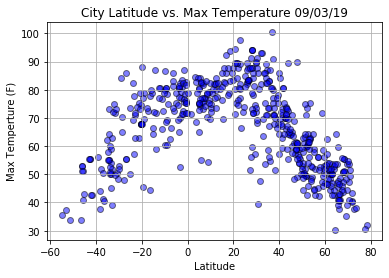

In [8]:
# Build the scatter plots 
plt.scatter(citiesdf['Latitude'], citiesdf['Max Temperature (F)'], linewidth=1, marker="o", 
            alpha=0.5, facecolor="blue", edgecolor="black", label="City")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature {time.strftime('%m/%d/%y')}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperture (F)")
plt.grid(True)

plt.savefig("Latitude_Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

In [9]:
citiesdf=citiesdf[(citiesdf['Humidity (%)']<=100)]

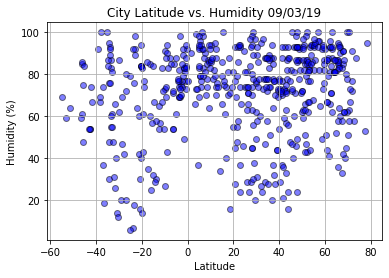

In [10]:
# Build the scatter plots 
plt.scatter(citiesdf['Latitude'], citiesdf['Humidity (%)'], linewidth=1, marker="o", 
            alpha=0.5, facecolor="blue", edgecolor="black", label="City")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity {time.strftime('%m/%d/%y')}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("Latitude_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

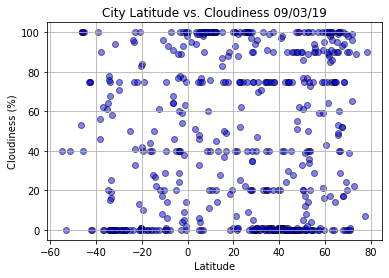

In [11]:
# Build the scatter plots 
plt.scatter(citiesdf['Latitude'], citiesdf['Cloudiness (%)'], linewidth=1, marker="o", 
            alpha=0.5, facecolor="blue", edgecolor="black", label="City")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness {time.strftime('%m/%d/%y')}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("Latitude_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

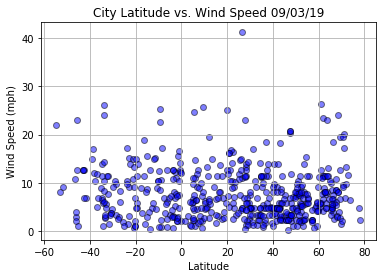

In [12]:
# Build the scatter plots 
plt.scatter(citiesdf['Latitude'], citiesdf['Wind Speed (mph)'], linewidth=1, marker="o", 
            alpha=0.5, facecolor="blue", edgecolor="black", label="City")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed {time.strftime('%m/%d/%y')}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("Latitude_WindSpeed.png")
plt.show()